# **Univariate Analysis**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PI-DAintern/Week 6/Superstore Sales/train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [ ]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 9800
Number of columns: 18


In [ ]:
print("\nFirst few rows of the DataFrame:")
print(df.head())


First few rows of the DataFrame:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code R

Data Cleaning

In [ ]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
if 'your_column' in df.columns:
    df['your_column'] = df['your_column'].fillna(df['your_column'].mean())

In [ ]:
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
             Row ID   Postal Code         Sales
count  9789.000000   9789.000000   9789.000000
mean   4896.705588  55273.322403    230.116193
std    2827.486899  32041.223413    625.302079
min       1.000000   1040.000000      0.444000
25%    2449.000000  23223.000000     17.248000
50%    4896.000000  58103.000000     54.384000
75%    7344.000000  90008.000000    210.392000
max    9800.000000  99301.000000  22638.480000


<ipython-input-43-ae71aafdd775>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['New_Column'] = [2] * len(df)


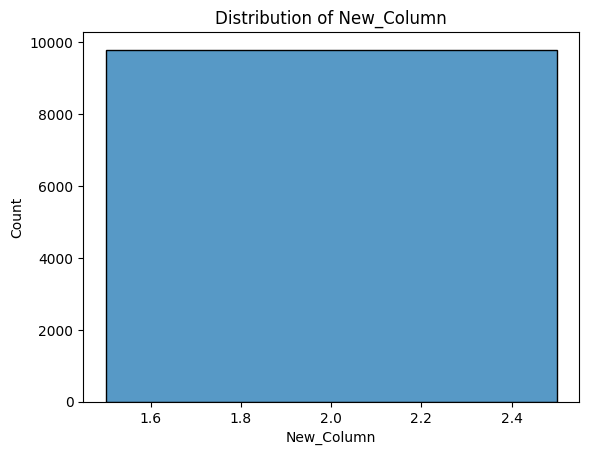

In [ ]:
df['New_Column'] = [2] * len(df)
sns.histplot(df['New_Column'])
plt.title('Distribution of New_Column')
plt.show()

<ipython-input-44-686f1508a338>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


<Axes: >

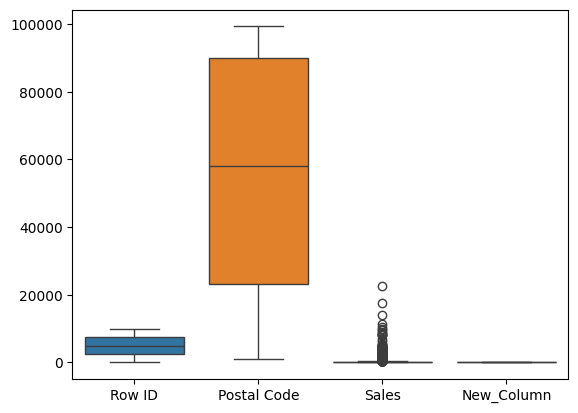

In [ ]:
df.fillna(df.mean(), inplace=True)
# Example of a boxplot for outlier detection
sns.boxplot(data=df)

Data Types

In [ ]:
data_types = df.dtypes

# Display data types
print("Data Types:")
print(data_types)

Data Types:
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
New_Column         int64
dtype: object


In [ ]:
summary_stats = df.describe()
df.describe()

,Row ID,Postal Code,Sales,New_Column
count,9789.000000,9789.000000,9789.000000,9789.0
mean,4896.705588,55273.322403,230.116193,2.0
std,2827.486899,32041.223413,625.302079,0.0
min,1.000000,1040.000000,0.444000,2.0
25%,2449.000000,23223.000000,17.248000,2.0
50%,4896.000000,58103.000000,54.384000,2.0
75%,7344.000000,90008.000000,210.392000,2.0
max,9800.000000,99301.000000,22638.480000,2.0


In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'New_Column'],
      dtype='object')

In [ ]:
df['column1'] = pd.to_numeric(df['Order ID'], errors='coerce')

In [ ]:
df['date_column'] = pd.to_datetime(df['Order Date'], errors='coerce')
df = df.rename(columns={'Order Date': 'date_column'})

<ipython-input-49-6d29abcaeea2>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date_column'] = pd.to_datetime(df['Order Date'], errors='coerce')


In [ ]:
df.head()

,Row ID,Order ID,date_column,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,New_Column,column1,date_column
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,NaN,2017-08-11
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2,NaN,2017-08-11
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,NaN,2017-12-06
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2,NaN,2016-11-10
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,NaN,2016-11-10


In [ ]:
data_types_after = df.dtypes
print("\nData Types After Conversion:")
print(data_types_after)


Data Types After Conversion:
Row ID                    int64
Order ID                 object
date_column              object
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
New_Column                int64
column1                 float64
date_column      datetime64[ns]
dtype: object


Descriptive Statistics

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'date_column', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'New_Column', 'column1', 'date_column'],
      dtype='object')

In [ ]:
data = {'Sales': [200, 250, 300, 750, 900],
        'Quantity': [30, 45, 60, 85, 90]}
df = pd.DataFrame(data)

In [ ]:
mean_sales = df['Sales'].mean()
mean_quantity = df['Quantity'].mean()

print(f'Mean Sales: {mean_sales}')
print(f'Mean Quantity: {mean_quantity}')

Mean Sales: 480.0
Mean Quantity: 62.0


In [ ]:
median_sales = df['Sales'].median()
median_quantity = df['Quantity'].median()

print(f'Median Sales: {median_sales}')
print(f'Median Quantity: {median_quantity}')

Median Sales: 300.0
Median Quantity: 60.0


In [ ]:
mode_sales = df['Sales'].mode()
mode_quantity = df['Quantity'].mode()

print(f'Mode Sales: {mode_sales.values}')
print(f'Mode Quantity: {mode_quantity.values}')

Mode Sales: [200 250 300 750 900]
Mode Quantity: [30 45 60 85 90]


In [ ]:
range_sales = df['Sales'].max() - df['Sales'].min()
range_quantity = df['Quantity'].max() - df['Quantity'].min()

print(f'Range Sales: {range_sales}')
print(f'Range Quantity: {range_quantity}')

Range Sales: 700
Range Quantity: 60


In [ ]:
std_sales = df['Sales'].std()
std_quantity = df['Quantity'].std()

print(f'Standard Deviation Sales: {std_sales}')
print(f'Standard Deviation Quantity: {std_quantity}')

Standard Deviation Sales: 321.32538026119255
Standard Deviation Quantity: 25.64176280991617


Histograms

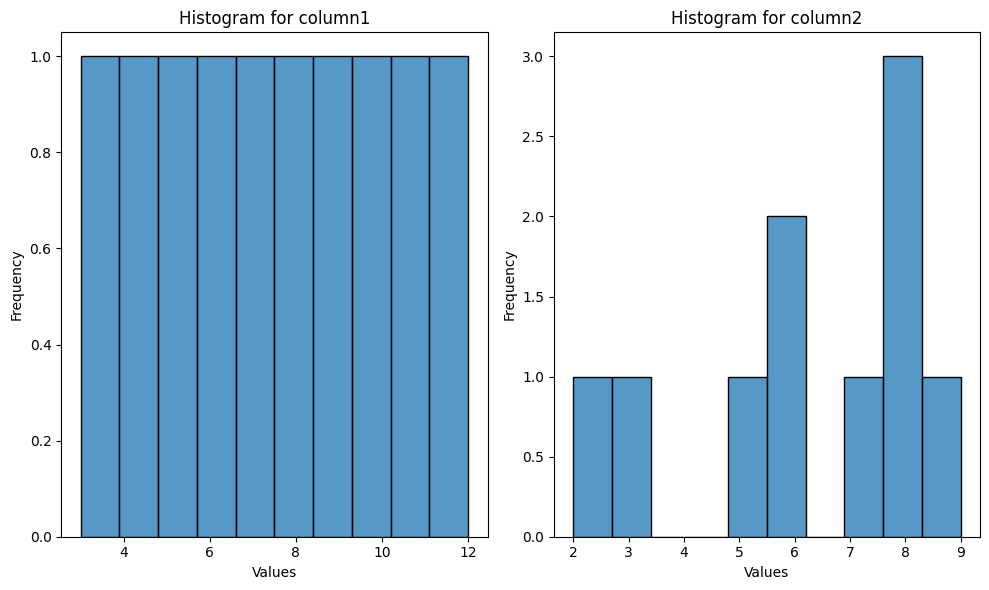

In [ ]:
data = {'column1': [3,4,5,6,7,8,9,10,11,12],
        'column2': [2,3,5,6,6,7,8,8,9,8]}

df = pd.DataFrame(data)

# Set up subplots for each histogram
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# Plot histograms using Matplotlib and Seaborn
sns.histplot(df['column1'], bins=10, kde=False, ax=axes[0])
axes[0].set_title('Histogram for column1')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

sns.histplot(df['column2'], bins=10, kde=False, ax=axes[1])
axes[1].set_title('Histogram for column2')
axes[1].set_xlabel('Values')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Time Series Plots

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PI-DAintern/Week 6/Superstore Sales/train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
df.shape

(9800, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
if 'LastUpdated' in df.columns:
    df['LastUpdated'] = pd.to_datetime(df['LastUpdated'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
df['LastUpdated'] = np.random.choice(pd.date_range('2023-01-01', '2023-03-31'), size=df.shape[0])

df.dropna(subset=['Order ID', 'Customer ID'], inplace=True)

In [ ]:
df['Date'] = df['LastUpdated'].dt.date

df['Time'] = df['LastUpdated'].dt.time

In [ ]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,LastUpdated,Date,Time
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2023-02-14,2023-02-14,00:00:00
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2023-01-25,2023-01-25,00:00:00
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2023-03-21,2023-03-21,00:00:00
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2023-03-21,2023-03-21,00:00:00
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2023-03-01,2023-03-01,00:00:00
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,2023-03-26,2023-03-26,00:00:00
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,2023-03-23,2023-03-23,00:00:00
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,2023-03-09,2023-03-09,00:00:00
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,2023-02-06,2023-02-06,00:00:00
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,2023-01-17,2023-01-17,00:00:00


In [ ]:
cols = ['Oder Id', 'Capacity', 'LastUpdated']

if all(col in df.columns for col in cols):
    # drop columns if they exist
    df.drop(cols, axis=1, inplace=True)

In [ ]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date               object
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
LastUpdated      datetime64[ns]
Date                     object
Time                     object
dtype: object

In [ ]:
df['Date'] = pd.to_datetime(df['Order Date'])

df.set_index('Date', inplace=True)

<ipython-input-74-230abad37966>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Order Date'])


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

df = df[pd.to_datetime(df['Order Date']).notna()]

df.groupby(pd.Grouper(freq='D')).mean()

<ipython-input-75-8120455f5385>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
<ipython-input-75-8120455f5385>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(pd.Grouper(freq='D')).mean()


,Row ID,Postal Code,Sales
Date,,,
2015-01-02,541.000000,54302.000000,468.900000
2015-01-03,6738.800000,70210.200000,220.315100
2015-01-04,4664.000000,48371.000000,29.972000
2015-01-05,NaN,NaN,NaN
2015-01-06,2232.181818,48500.727273,471.683636
...,...,...,...
2018-12-26,4607.250000,60904.250000,203.648500
2018-12-27,2570.500000,43055.000000,88.818000
2018-12-28,4309.473684,59738.052632,87.228989


In [ ]:
df['Date'] = pd.date_range('2023-01-01', periods=9800)

df.set_index('Order ID', inplace=True)

In [ ]:
df.index

Index(['CA-2017-152156', 'CA-2017-152156', 'CA-2017-138688', 'US-2016-108966',
       'US-2016-108966', 'CA-2015-115812', 'CA-2015-115812', 'CA-2015-115812',
       'CA-2015-115812', 'CA-2015-115812',
       ...
       'CA-2018-144491', 'CA-2015-127166', 'CA-2015-127166', 'CA-2015-127166',
       'CA-2015-127166', 'CA-2017-125920', 'CA-2016-128608', 'CA-2016-128608',
       'CA-2016-128608', 'CA-2016-128608'],
      dtype='object', name='Order ID', length=9800)

In [ ]:
df.rename(columns={'Order ID': 'Order_ID'}, inplace=True)

In [ ]:
if "Order ID" in df.columns:
    df.drop("Order ID", axis=1, inplace=True)

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [ ]:
resampled_df = df.resample('D', on='Order Date').mean()

<ipython-input-83-708ab7e67fec>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resampled_df = df.resample('D', on='Order Date').mean()


In [ ]:
df.isnull().sum()

Row ID            0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
LastUpdated       0
Time              0
Date              0
dtype: int64

In [ ]:
df.fillna(method='bfill', inplace=True)

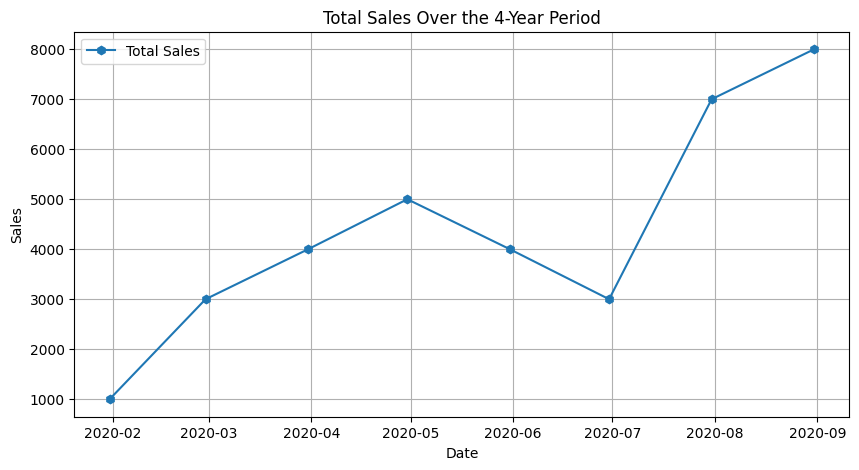

In [ ]:
monthly_sales = pd.Series(data=[1000,3000,4000,5000,4000,3000,7000,8000],
                          index=pd.date_range(start='2020-01-01', periods=8, freq='M'))

# Plotting the total sales over the 4-year period
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales, label='Total Sales', marker='h')  # You can add a marker for each data point if needed
plt.title('Total Sales Over the 4-Year Period')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)  # You can add a grid if desired
plt.show()

Seasonal Decomposition

In [ ]:
print(df.columns)

# Assuming the date column is present and named 'Date', change the index
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
else:
    print("Error: 'Date' column not found in the DataFrame.")

# Display the first few rows of the data
df.head()

Index(['Row ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'LastUpdated', 'Time', 'Date'],
      dtype='object')


,Row ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,LastUpdated,Time
Date,,,,,,,,,,,,,,,,,,,
2023-01-01,1,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2023-02-14,00:00:00
2023-01-02,2,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2023-01-25,00:00:00
2023-01-03,3,2017-12-06,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2023-03-21,00:00:00
2023-01-04,4,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2023-03-21,00:00:00
2023-01-05,5,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2023-03-01,00:00:00


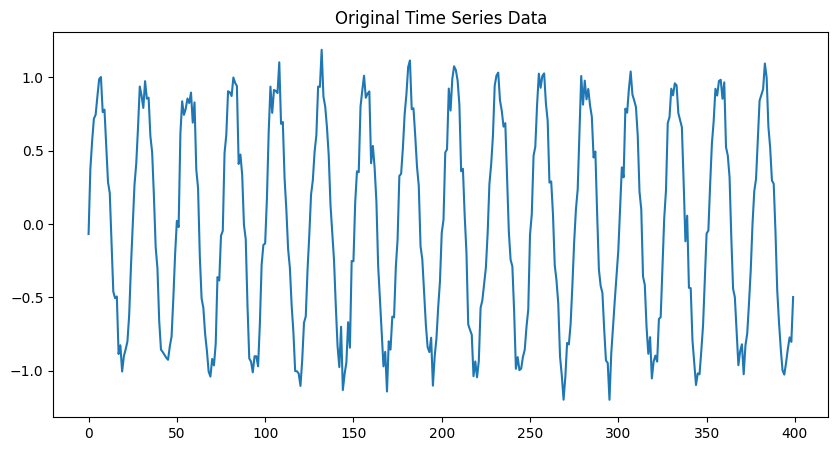

In [ ]:
# Replace the following line with your actual data
# data with a hypothetical time series
time_series_data = pd.Series(np.sin(np.linspace(0, 100, 400)) + np.random.normal(0, 0.1, 400), name='Value')

# Plot the original time series data
plt.figure(figsize=(10, 5))
plt.plot(time_series_data)
plt.title('Original Time Series Data')
plt.show()

Decompose the time series into its components

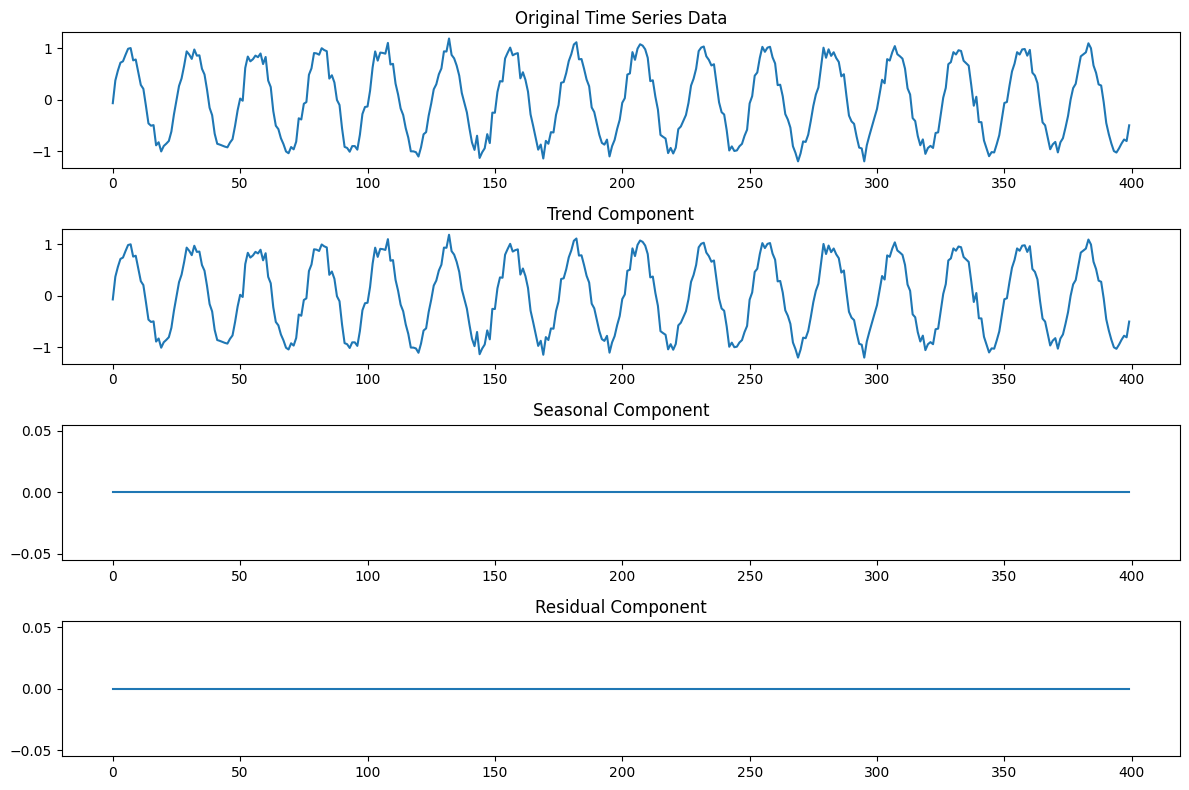

In [ ]:
result = seasonal_decompose(time_series_data, model='additive', period=1)  # You can adjust the period parameter based on the seasonality of your data

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.observed)
plt.title('Original Time Series Data')

plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residual Component')

plt.tight_layout()
plt.show()

Box Plots

In [ ]:
np.random.seed(42)
df = pd.DataFrame({
    'Variable1': np.random.normal(0, 1, 1000),
    'Variable2': np.random.normal(0, 1, 1000),
})

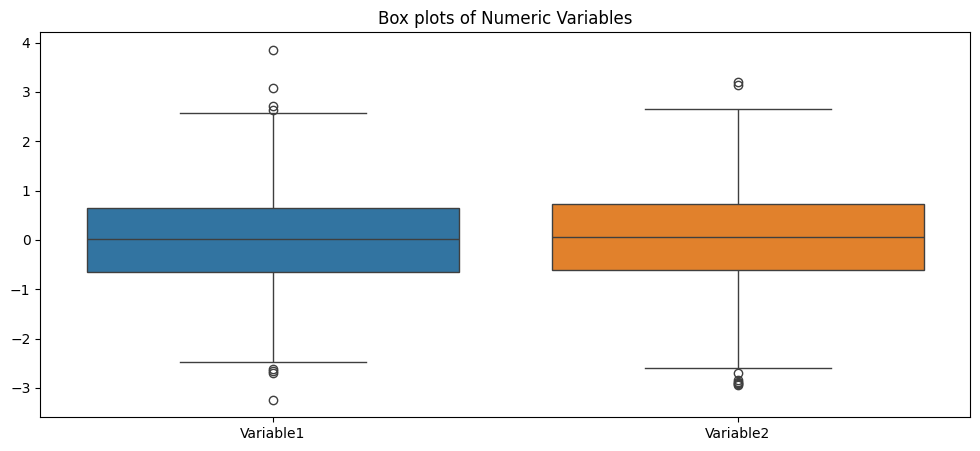

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df)
plt.title('Box plots of Numeric Variables')
plt.show()

Sales Distribution by Category

In [ ]:
categories = ['Category A', 'Category B', 'Category C', 'Category D']
sales = [17000, 32000, 88000, 29000]

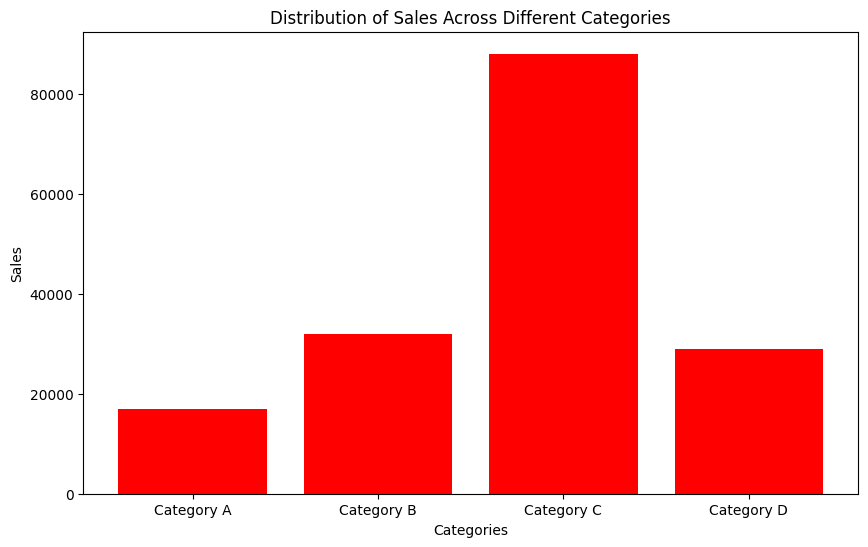

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(categories, sales, color='red')
plt.title('Distribution of Sales Across Different Categories')
plt.xlabel('Categories')
plt.ylabel('Sales')
plt.show()

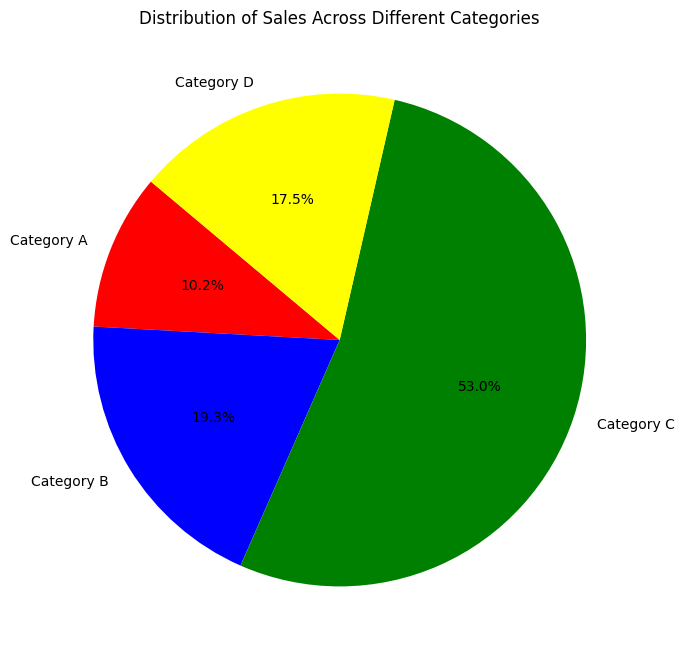

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(sales, labels=categories, autopct='%1.1f%%', startangle=140, colors=['red', 'blue', 'green', 'yellow'])
plt.title('Distribution of Sales Across Different Categories')
plt.show()

Sales Variation Over Time

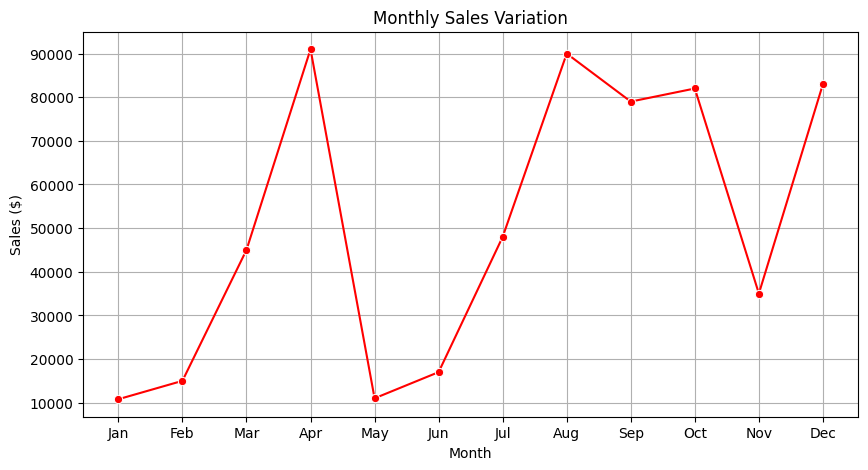

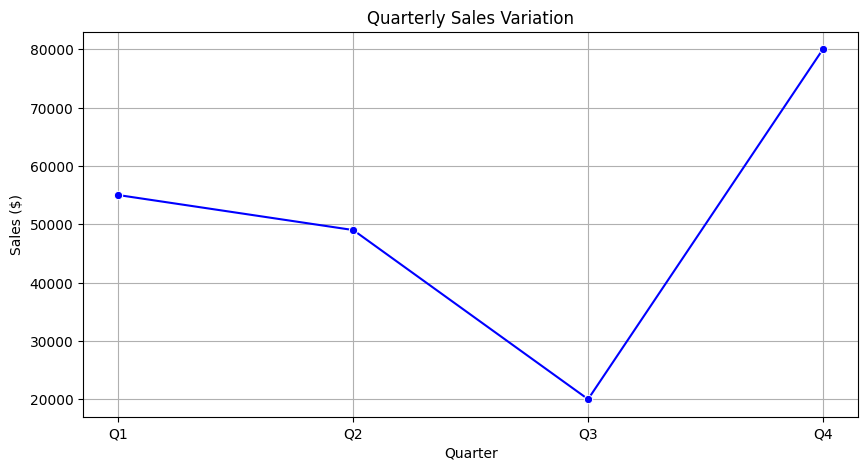

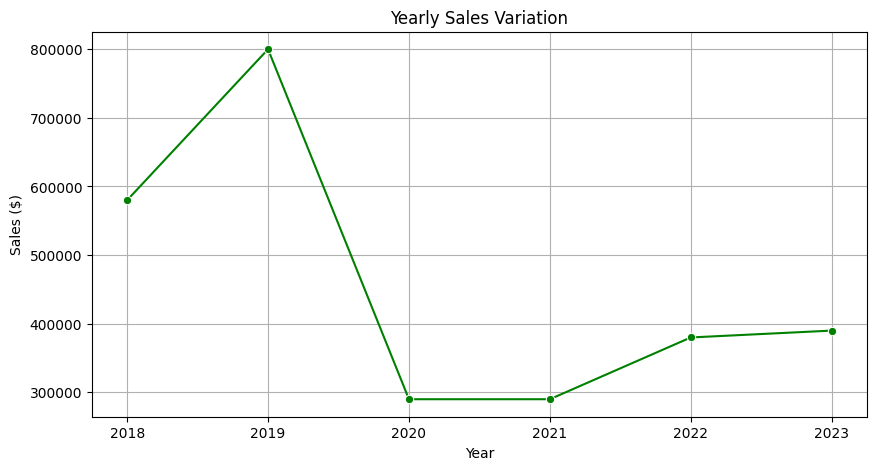

In [ ]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_sales = [10789, 15000, 45000, 91000, 11000, 17000, 48000, 90000, 79000, 82000, 35000, 83000]

quarters = ['Q1', 'Q2', 'Q3', 'Q4']
quarterly_sales = [55000, 49000, 20000, 80000]

years = ['2018', '2019', '2020', '2021', '2022', '2023']
yearly_sales = [580000, 800000, 290000, 290000, 380000, 390000]

# Monthly Sales Line Chart
plt.figure(figsize=(10, 5))
sns.lineplot(x=months, y=monthly_sales, marker='o', color='r')
plt.title('Monthly Sales Variation')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.show()

# Quarterly Sales Line Chart
plt.figure(figsize=(10, 5))
sns.lineplot(x=quarters, y=quarterly_sales, marker='o', color='b')
plt.title('Quarterly Sales Variation')
plt.xlabel('Quarter')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.show()

# Yearly Sales Line Chart
plt.figure(figsize=(10, 5))
sns.lineplot(x=years, y=yearly_sales, marker='o', color='g')
plt.title('Yearly Sales Variation')
plt.xlabel('Year')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.show()

# **Bivariate analysis**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PI-DAintern/Week 6/Superstore Sales/train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
correlation_matrix = df.corr()

<ipython-input-5-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [ ]:
if 'sales' in correlation_matrix:
    sales_correlation = correlation_matrix['sales']

In [ ]:
sales_correlation = df.corr()

<ipython-input-7-1690d5a80b9a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sales_correlation = df.corr()


<Axes: >

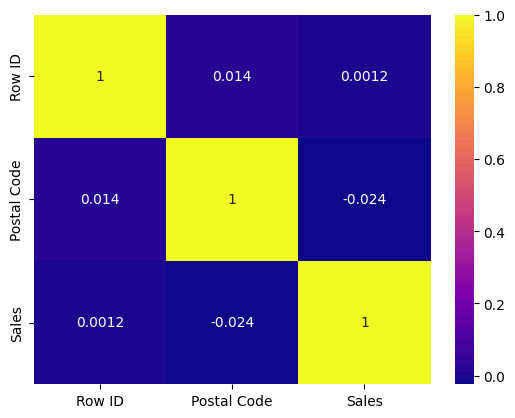

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='plasma')

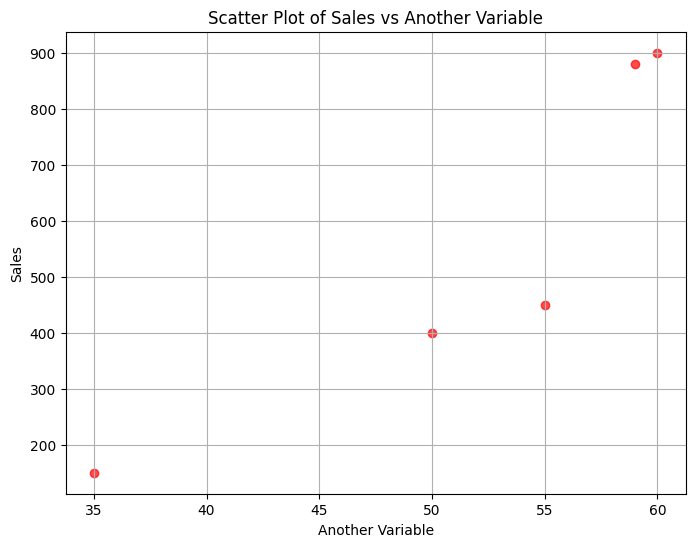

In [ ]:
# Assuming df is your DataFrame with columns 'sales' and 'another_variable'
data = {'sales': [400, 450, 900, 150, 880],
        'another_variable': [50, 55, 60, 35, 59]}
df = pd.DataFrame(data)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['another_variable'], df['sales'], color='red', alpha=0.7)
plt.title('Scatter Plot of Sales vs Another Variable')
plt.xlabel('Another Variable')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [ ]:
df = pd.DataFrame(data)

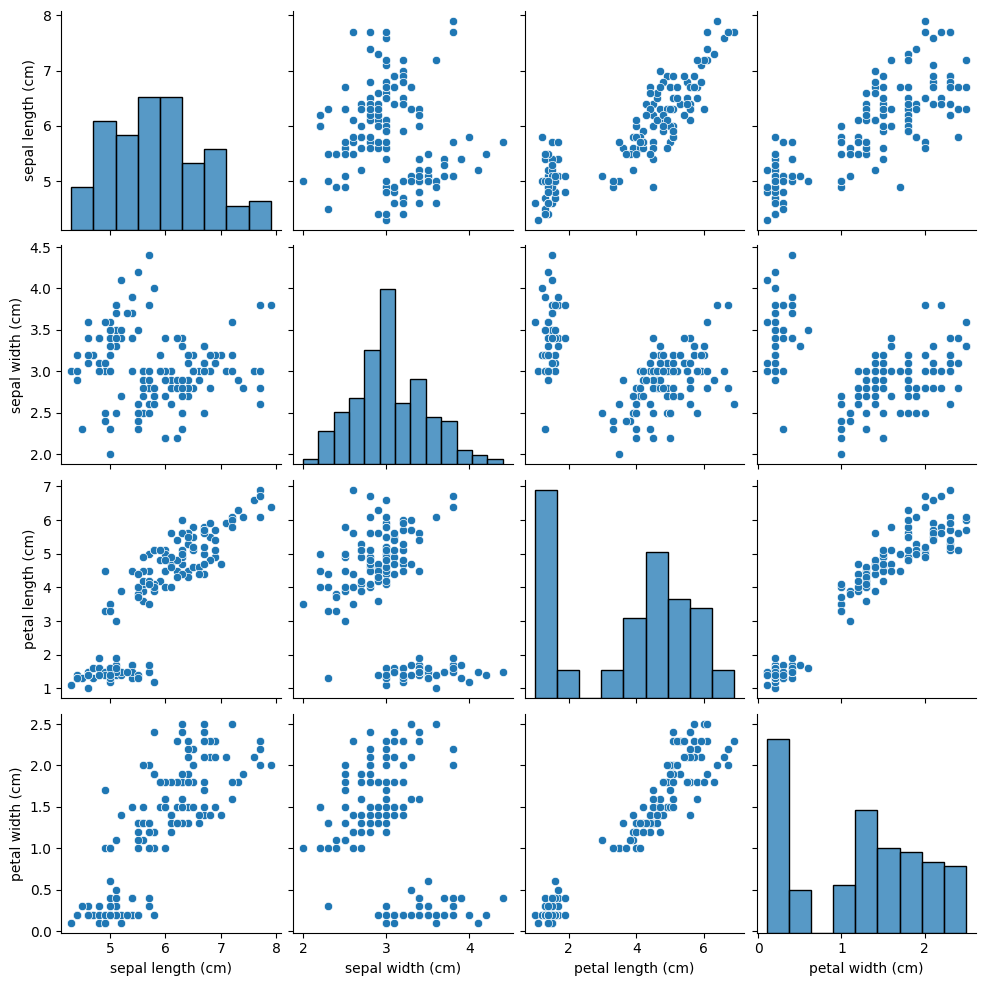

In [ ]:
from sklearn import datasets
# Import the iris dataset
iris = datasets.load_iris()

# Convert the iris dataset to a DataFrame
iris = pd.DataFrame(iris.data, columns=iris.feature_names)

# Create the pair plot
sns.pairplot(iris)

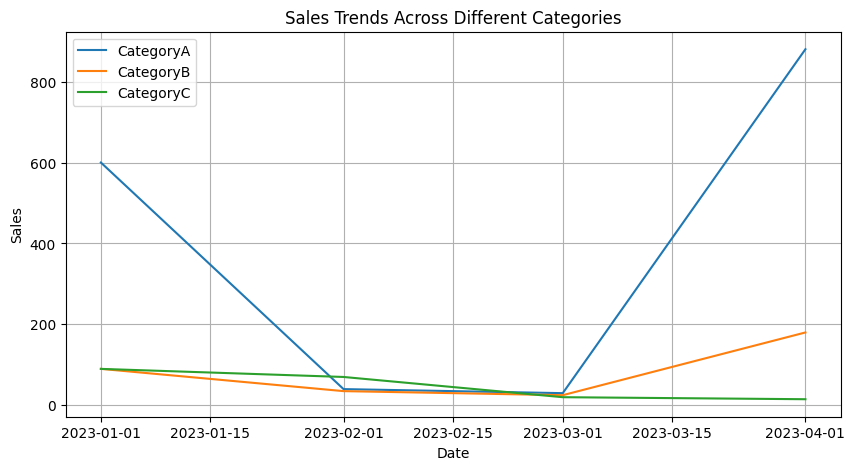

In [ ]:
data = {
    'Date': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01'],
    'CategoryA': [600, 40, 30, 880],
    'CategoryB': [90, 35, 25, 180],
    'CategoryC': [90, 70, 20, 15]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Plotting line charts for each category
plt.figure(figsize=(10, 5))

for column in df.columns:
    plt.plot(df.index, df[column], label=column)

# Customize the plot
plt.title('Sales Trends Across Different Categories')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Creating a random dataset
np.random.seed(42)
data = pd.DataFrame(np.random.rand(10, 5), columns=['p','q','r','s','t'])

In [ ]:
correlation_matrix = data.corr()

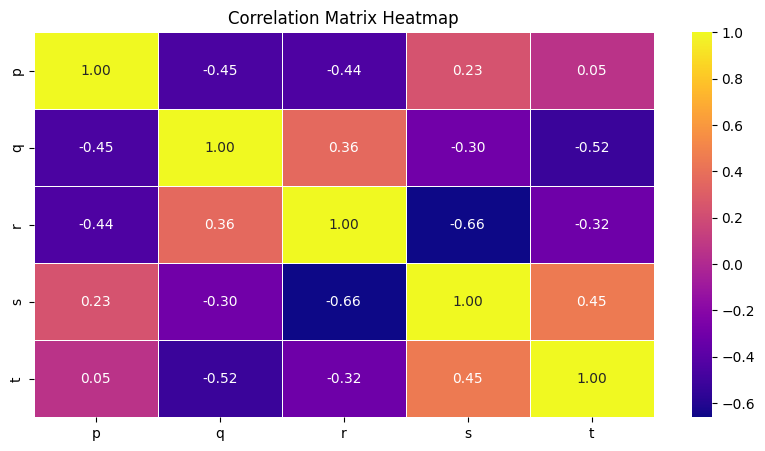

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
regions = ['North', 'South', 'East', 'West']
sales = [500030, 765432, 600900, 100000]

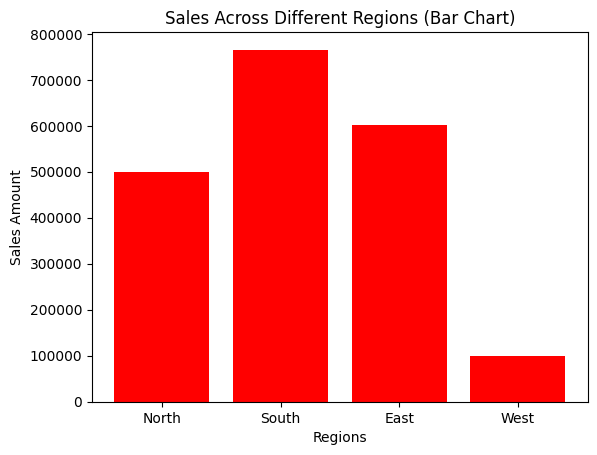

In [ ]:
plt.bar(regions, sales, color='red')
plt.title('Sales Across Different Regions (Bar Chart)')
plt.xlabel('Regions')
plt.ylabel('Sales Amount')
plt.show()

In [ ]:
regions = ['North', 'South', 'East', 'West']
product_a = [900000, 700000, 290000, 200000]
product_b = [900000, 500000, 200000, 900000]

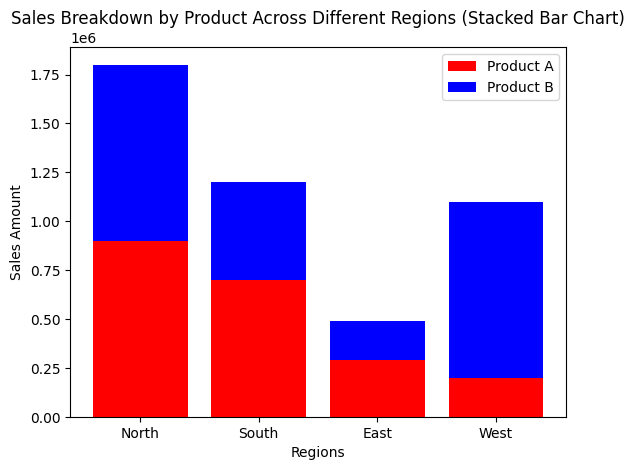

In [ ]:
plt.bar(regions, product_a, label='Product A', color='red')
plt.bar(regions, product_b, label='Product B', color='blue', bottom=product_a)

plt.title('Sales Breakdown by Product Across Different Regions (Stacked Bar Chart)')
plt.xlabel('Regions')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()

In [ ]:
data = {
    'Date': ['2022-01-01', '2022-02-01', '2022-03-01', '2022-01-01', '2022-02-01', '2022-03-01'],
    'Segment': ['A', 'A', 'A', 'B', 'B', 'B'],
    'Sales': [800, 320, 850, 90, 90, 810]
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

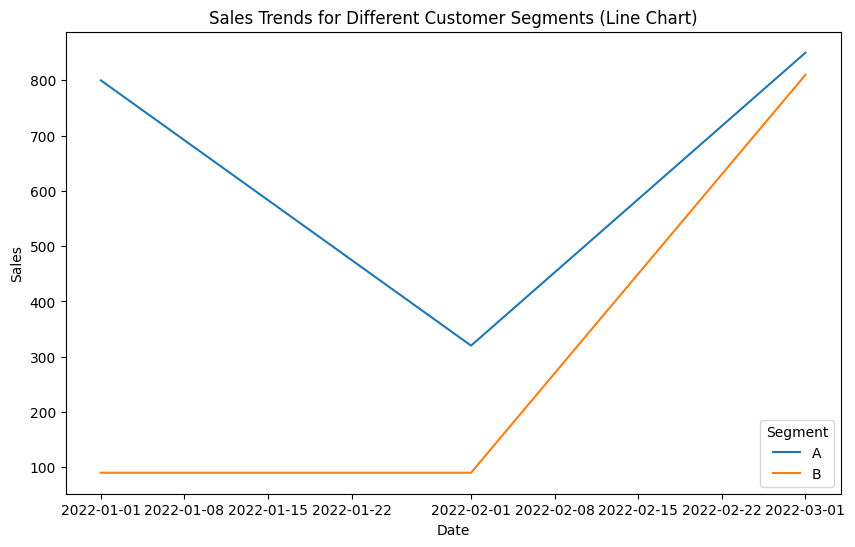

In [ ]:
# Plotting a Line Chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Sales', hue='Segment', data=df)
plt.title('Sales Trends for Different Customer Segments (Line Chart)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

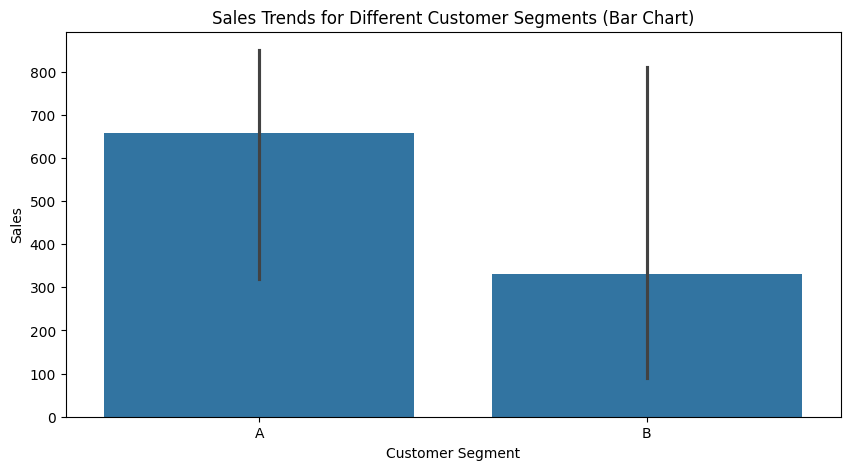

In [ ]:
# Plotting a Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(x='Segment', y='Sales', data=df)
plt.title('Sales Trends for Different Customer Segments (Bar Chart)')
plt.xlabel('Customer Segment')
plt.ylabel('Sales')
plt.show()

In [ ]:
sales = np.random.randint(1000, 10011, size=50)
quantity_sold = np.random.randint(1000, 10011, size=50)

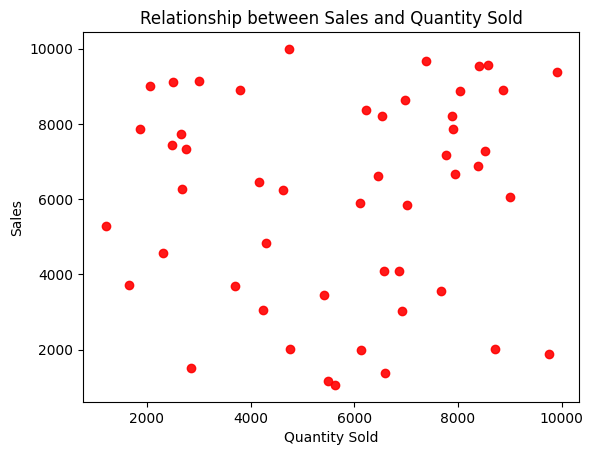

In [ ]:
# Scatter plot
plt.scatter(quantity_sold, sales, c='red', alpha=0.9)

# Title and labels
plt.title('Relationship between Sales and Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Sales')

# Display the plot
plt.show()

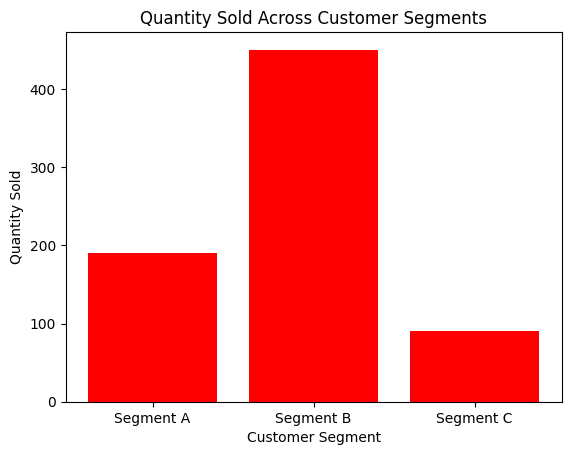

In [ ]:
# data
segments = ['Segment A', 'Segment B', 'Segment C']
quantity_sold = [190, 450, 90]

# Create a bar chart
plt.bar(segments, quantity_sold, color='red')

# Customize the chart
plt.xlabel('Customer Segment')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold Across Customer Segments')

# Show the chart
plt.show()

In [ ]:
np.random.seed(100)
discounts = np.arange(0, 89, 5)
sales = np.random.randint(100, 500, len(discounts))

In [ ]:
data = pd.DataFrame({'Discount': discounts, 'Sales': sales})

In [ ]:
print(data)

    Discount  Sales
0          0    108
1          5    380
2         10    423
3         15    459
4         20    443
5         25    179
6         30    494
7         35    450
8         40    454
9         45    153
10        50    166
11        55    326
12        60    114
13        65    390
14        70    340
15        75    380
16        80    243
17        85    328


<ipython-input-32-e5fce92f6509>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Discount', y='Sales', data=data, palette='viridis')


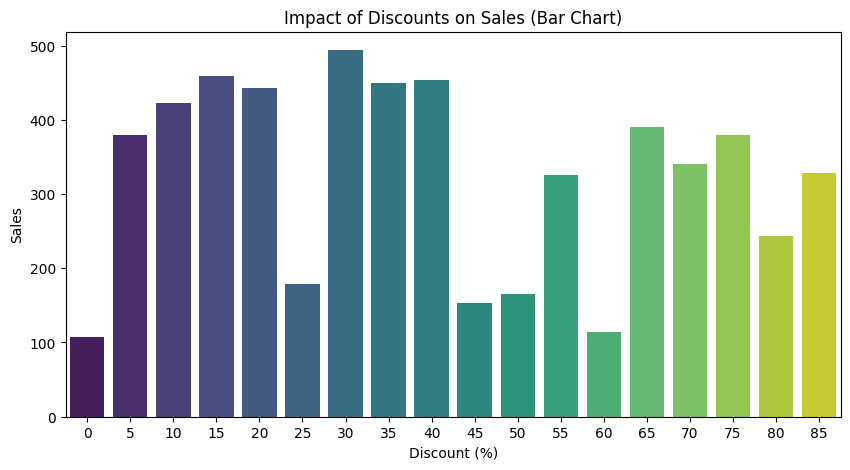

In [ ]:
# Plot a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x='Discount', y='Sales', data=data, palette='viridis')
plt.title('Impact of Discounts on Sales (Bar Chart)')
plt.xlabel('Discount (%)')
plt.ylabel('Sales')
plt.show()

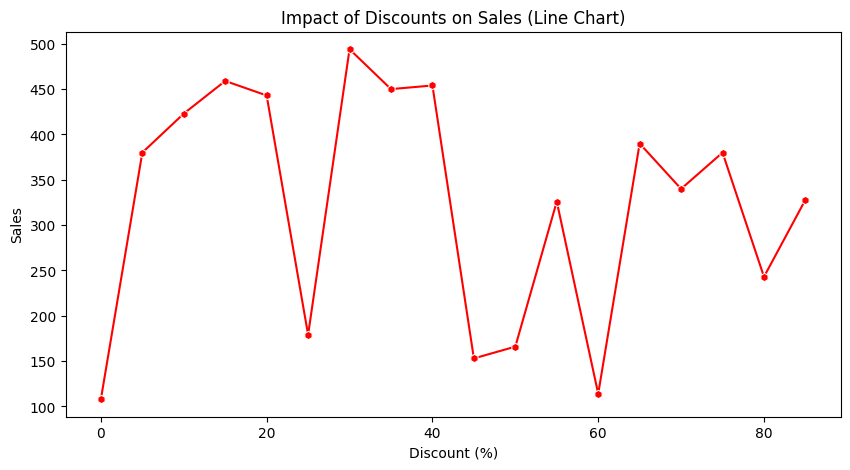

In [ ]:
# Plot a line chart
plt.figure(figsize=(10, 5))
sns.lineplot(x='Discount', y='Sales', data=data, marker='h', color='r')
plt.title('Impact of Discounts on Sales (Line Chart)')
plt.xlabel('Discount (%)')
plt.ylabel('Sales')
plt.show()

In [ ]:
data = {
    'Shipping Mode': ['Standard', 'Express', 'Standard', 'Express', 'Express', 'Standard', 'Express', 'Standard'],
    'Sales': [2000, 3600, 1650, 2580, 4600, 1880, 69320, 9220]
}

In [ ]:
df = pd.DataFrame(data)

<ipython-input-36-e2c39c42bc4f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Shipping Mode', y='Sales', data=df, kind='bar', ci=None, palette='viridis')
<ipython-input-36-e2c39c42bc4f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='Shipping Mode', y='Sales', data=df, kind='bar', ci=None, palette='viridis')


<Figure size 1000x600 with 0 Axes>

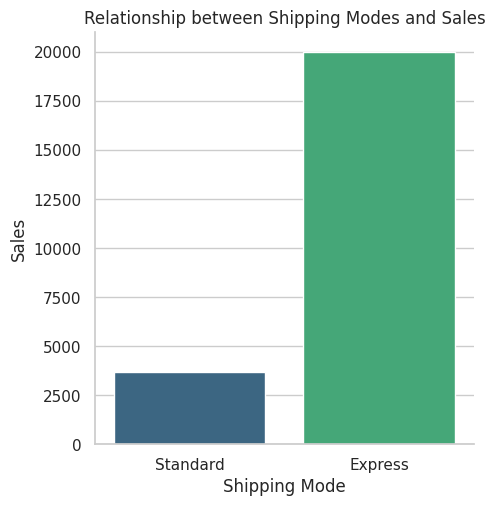

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.catplot(x='Shipping Mode', y='Sales', data=df, kind='bar', ci=None, palette='viridis')

plt.title('Relationship between Shipping Modes and Sales')
plt.xlabel('Shipping Mode')
plt.ylabel('Sales')
plt.show()

In [ ]:
data = {'Product': ['A', 'B', 'C', 'D', 'A', 'B', 'C', 'D'],
        'Category': ['Electronics', 'Electronics', 'Clothing', 'Clothing', 'Electronics', 'Electronics', 'Clothing', 'Clothing'],
        'Sales': [1009, 1950, 890, 1720, 1820, 890, 680, 8110]}

In [ ]:
df = pd.DataFrame(data)

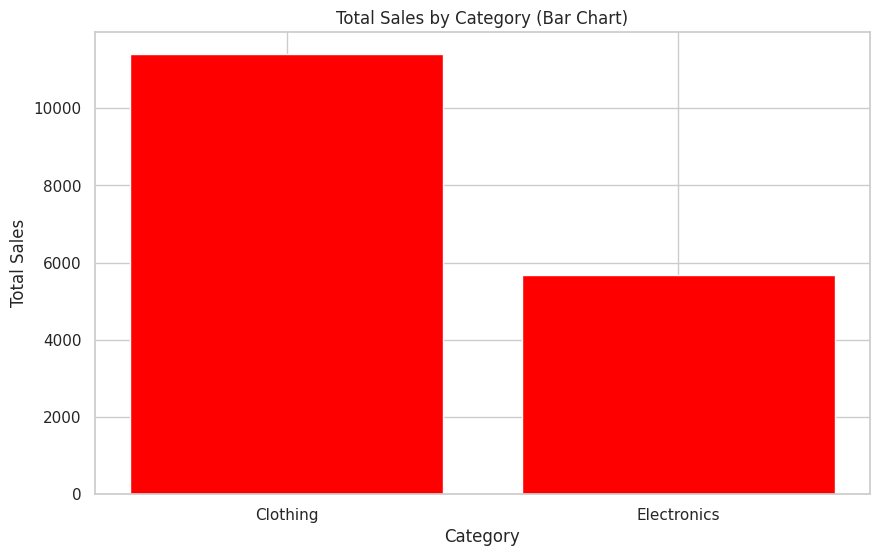

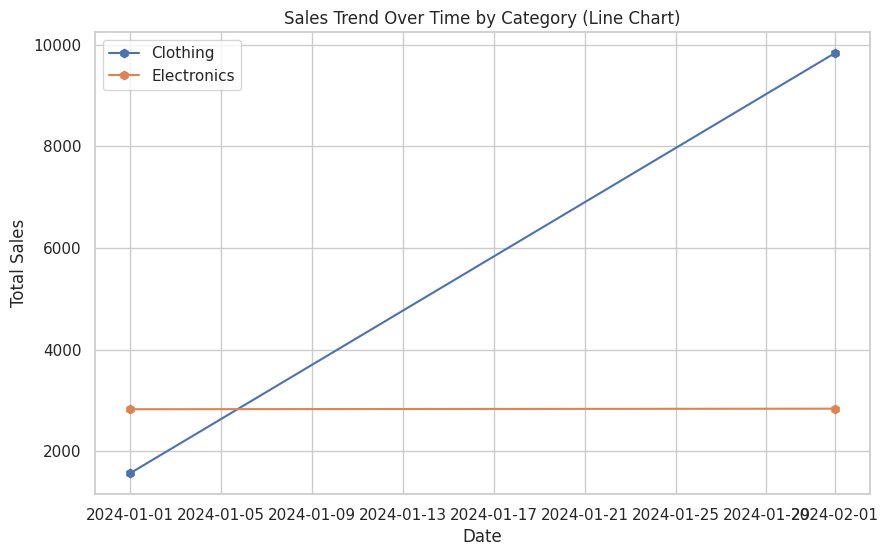

In [ ]:
plt.figure(figsize=(10, 6))
df_grouped = df.groupby('Category')['Sales'].sum().reset_index()
plt.bar(df_grouped['Category'], df_grouped['Sales'], color='red')
plt.title('Total Sales by Category (Bar Chart)')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

df['Date'] = pd.to_datetime(['2024-01-01', '2024-02-01'] * 4, format='%Y-%m-%d')
df_time = df.groupby(['Date', 'Category'])['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
for category in df_time['Category'].unique():
    plt.plot(df_time[df_time['Category'] == category]['Date'], df_time[df_time['Category'] == category]['Sales'], marker='h', label=category)

plt.title('Sales Trend Over Time by Category (Line Chart)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [ ]:
# Sample data
regions = ['North', 'South', 'East', 'West']
products = ['Product A', 'Product B', 'Product C']
sales = np.array([
    [2000, 3200, 800],
    [800, 7100, 750],
    [1700, 900, 950],
    [950,8300, 2300]
])

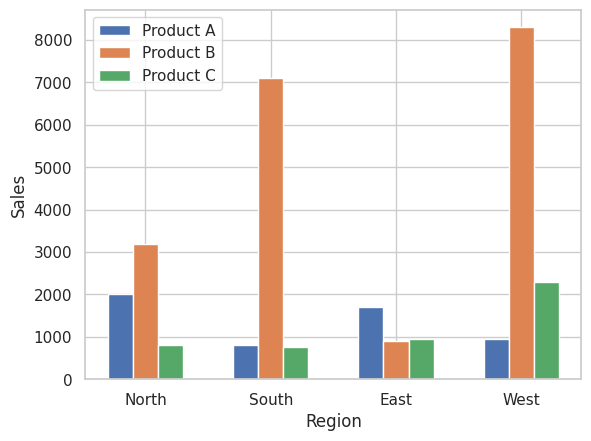

In [ ]:
bar_width = 0.2
r1 = np.arange(len(regions))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, sales[:, 0], width=bar_width, label='Product A')
plt.bar(r2, sales[:, 1], width=bar_width, label='Product B')
plt.bar(r3, sales[:, 2], width=bar_width, label='Product C')

# Customize chart
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks([r + bar_width for r in range(len(regions))], regions)
plt.legend()

# Show the plot
plt.show()

In [ ]:
df = pd.DataFrame(data)
df.describe()

,Sales
count,8.000000
mean,2133.625000
std,2463.772829
min,680.000000
25%,890.000000
50%,1364.500000
75%,1852.500000
max,8110.000000


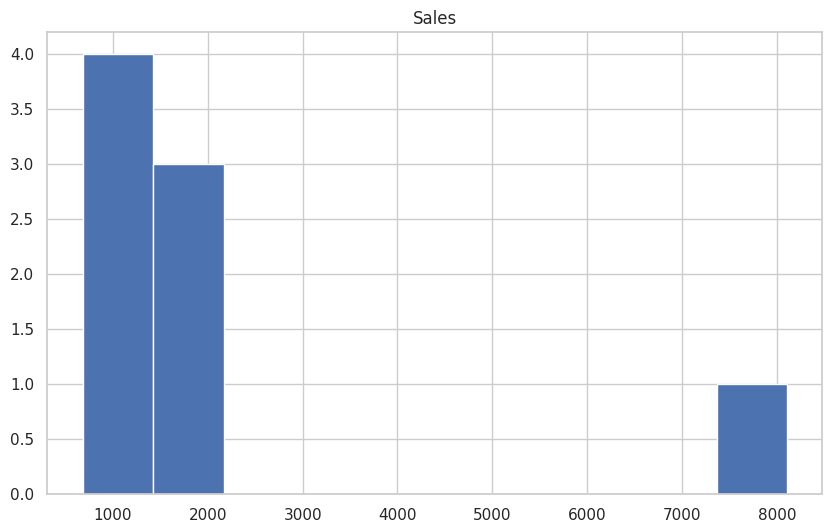

In [ ]:
data = pd.DataFrame(data)
data.hist(figsize=(10, 6))
plt.show()

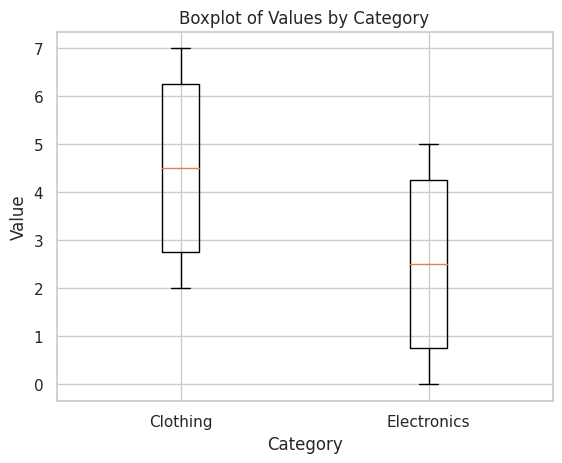

In [ ]:
# Assuming df is your DataFrame with columns 'Category' and 'Value'
df['Value'] = [0,1, 2, 3, 4, 5,6, 7]

# Group the DataFrame by 'Category' and extract the 'Value' column
grouped_df = df.groupby('Category')['Value']

# Convert the grouped data to a list for boxplot
data_to_plot = [group.values for name, group in grouped_df]

# Create a boxplot using Matplotlib
plt.boxplot(data_to_plot, labels=grouped_df.groups.keys())
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Boxplot of Values by Category')
plt.show()

Index(['variable1', 'variable2'], dtype='object')
variable1    int64
variable2    int64
dtype: object


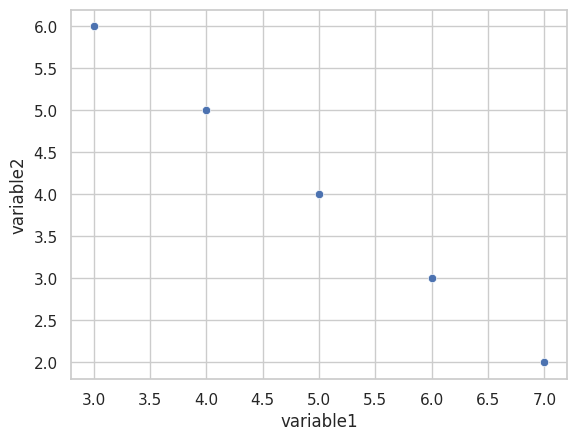

In [ ]:
# data
import pandas as pd
data = pd.DataFrame({'variable1': [3,4,5,6,7],
                     'variable2': [6,5,4,3,2]})

# Check the column names and data types
print(data.columns)
print(data.dtypes)

# Plotting
sns.scatterplot(x='variable1', y='variable2', data=data)
plt.show()

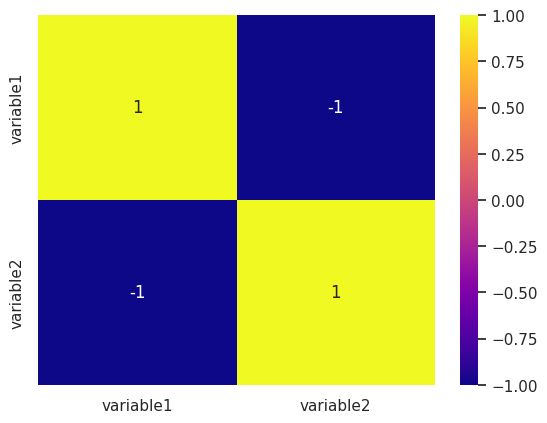

In [ ]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix,cmap='plasma', annot=True, )
plt.show()

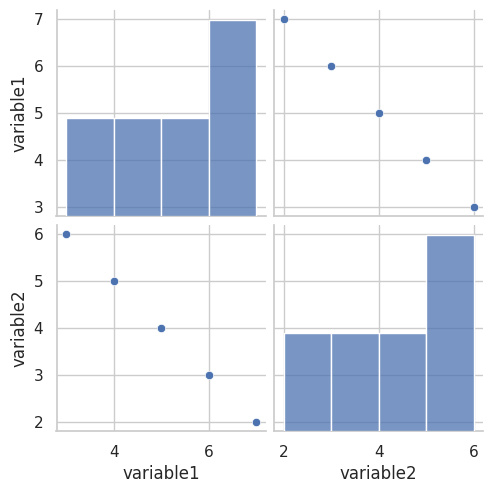

In [ ]:
sns.pairplot(data)
plt.show()